In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("jawa barat.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<ipython-input-2-84aaa7834279>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  314 non-null    datetime64[ns]
 1   Tn       295 non-null    float64       
 2   Tx       300 non-null    float64       
 3   Tavg     303 non-null    float64       
 4   RH_avg   302 non-null    float64       
 5   RR       204 non-null    float64       
 6   ss       310 non-null    float64       
 7   ff_x     311 non-null    float64       
 8   ddd_x    311 non-null    float64       
 9   ff_avg   311 non-null    float64       
 10  ddd_car  311 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 27.1+ KB


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,NaN,28.2,30.5,24.3
1,2023-02-01,20.7,29.3,25.0,24.4
2,2023-03-01,21.0,27.5,21.8,24.3
3,2023-04-01,21.5,29.3,10.6,25.4
4,2023-05-01,21.4,31.5,1.9,26.0
...,...,...,...,...,...
309,2023-10-28,22.8,35.0,8888.0,28.4
310,2023-10-29,22.0,35.5,NaN,27.8
311,2023-10-30,21.9,35.2,NaN,28.7
312,2023-10-31,24.2,35.2,NaN,26.9


In [4]:
# cek duplikat
df1.duplicated().sum()

9

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,NaN,28.2,30.5,24.3
1,31,31,2023-01-02,22.6,NaN,5.6,25.2
2,59,60,2023-01-03,21.1,28.4,7.0,24.9
3,90,92,2023-01-04,23.8,28.8,NaN,26.1
4,120,123,2023-01-05,NaN,31.6,0.0,27.5
...,...,...,...,...,...,...,...
300,162,167,2023-12-06,22.6,32.6,NaN,27.5
301,192,198,2023-12-07,22.6,32.9,NaN,26.8
302,223,230,2023-12-08,21.3,32.0,NaN,25.7
303,254,262,2023-12-09,21.2,34.0,0.0,26.9


In [8]:
#cek null
df1.isnull().sum()

level_0      0
index        0
Tanggal      0
Tn          18
Tx          13
RR         105
Tavg        11
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(ma)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

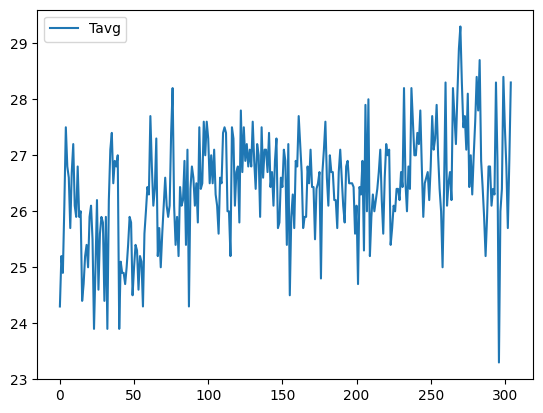

In [10]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

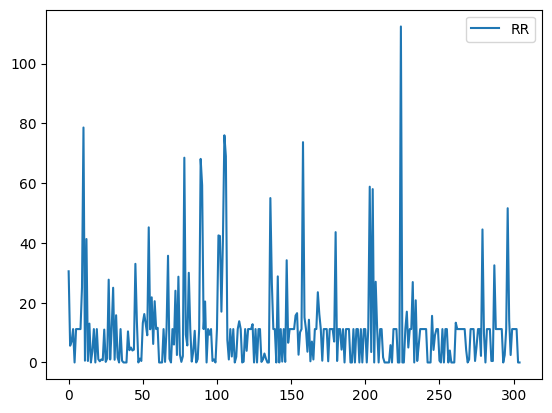

In [11]:
#plotting tavg
df1[['RR']].plot()

In [12]:
#cek outllier
for i, row in df1.iterrows():
  if row['RR'] > 80 :
    print(row)

level_0                    239
index                      246
Tanggal    2023-08-28 00:00:00
Tn                        20.6
Tx                        32.0
RR                       112.4
Tavg                      25.7
Name: 224, dtype: object


In [13]:
#ganti outlier
for i, row in df1.iterrows():
  if row['RR'] > 80 :
    df1.at[i, 'RR'] = (df1.at[(i+1), 'RR'] + df1.at[(i-1), 'RR'])/2

<Axes: >

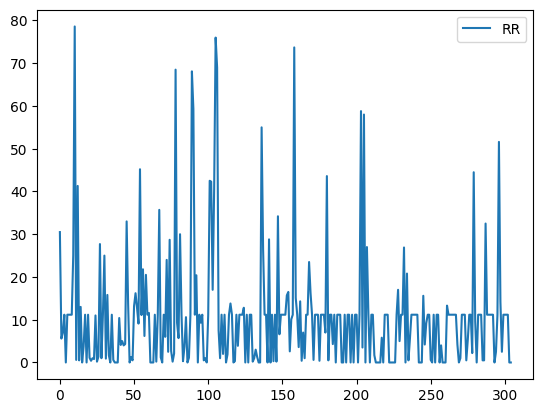

In [14]:
df1[['RR']].plot()

In [15]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.416725,28.200000,30.5000,24.3,32.366781,25.2,5.6000
1,31,31,2023-01-02,22.600000,32.366781,5.6000,25.2,28.400000,24.9,7.0000
2,59,60,2023-01-03,21.100000,28.400000,7.0000,24.9,28.800000,26.1,11.1745
3,90,92,2023-01-04,23.800000,28.800000,11.1745,26.1,31.600000,27.5,0.0000
4,120,123,2023-01-05,22.416725,31.600000,0.0000,27.5,33.400000,26.8,11.1745
...,...,...,...,...,...,...,...,...,...,...
300,162,167,2023-12-06,22.600000,32.600000,11.1745,27.5,32.900000,26.8,11.1745
301,192,198,2023-12-07,22.600000,32.900000,11.1745,26.8,32.000000,25.7,11.1745
302,223,230,2023-12-08,21.300000,32.000000,11.1745,25.7,34.000000,26.9,0.0000
303,254,262,2023-12-09,21.200000,34.000000,0.0000,26.9,34.200000,28.3,0.0000


In [16]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,30.5000,24.3,25.2,5.6000
1,5.6000,25.2,24.9,7.0000
2,7.0000,24.9,26.1,11.1745
3,11.1745,26.1,27.5,0.0000
4,0.0000,27.5,26.8,11.1745
...,...,...,...,...
300,11.1745,27.5,26.8,11.1745
301,11.1745,26.8,25.7,11.1745
302,11.1745,25.7,26.9,0.0000
303,0.0000,26.9,28.3,0.0000


In [17]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,30.5000,24.3,25.2,5.6000
1,5.6000,25.2,24.9,7.0000
2,7.0000,24.9,26.1,11.1745
3,11.1745,26.1,27.5,0.0000
4,0.0000,27.5,26.8,11.1745
...,...,...,...,...
299,11.1745,28.4,27.5,11.1745
300,11.1745,27.5,26.8,11.1745
301,11.1745,26.8,25.7,11.1745
302,11.1745,25.7,26.9,0.0000


In [18]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,30.5000,24.3,25.2,5.6000,0
1,5.6000,25.2,24.9,7.0000,1
2,7.0000,24.9,26.1,11.1745,2
3,11.1745,26.1,27.5,0.0000,3
4,0.0000,27.5,26.8,11.1745,4
...,...,...,...,...,...
299,11.1745,28.4,27.5,11.1745,299
300,11.1745,27.5,26.8,11.1745,300
301,11.1745,26.8,25.7,11.1745,301
302,11.1745,25.7,26.9,0.0000,302


In [20]:
#data training dan testing
X = df1['Indeks']
y = df1["pta"]

X1 = df1['Tavg']
y1 = df1["pta"]

X2 = df1['RR']
y2 = df1["ptr"]

X3 = df1['Indeks']
y3 = df1["RR"]

In [21]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [22]:
X_train = np.array(X_train).reshape(-1, 1)

In [23]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
#testing
X_test1 = np.array(X_test).reshape(-1, 1)
pred1 = lr.predict(X_test1)
pred1

array([26.88952153, 26.50391297, 26.15686526, 26.3882304 , 26.42679125,
       26.46535211, 26.27254783, 26.50391297, 26.85096067, 26.61959554,
       26.69671725, 26.92808239, 26.58103468, 26.34966954, 26.19542612,
       25.80981755, 26.34966954, 27.08232581, 26.23398697, 26.3882304 ,
       26.46535211, 26.27254783, 27.04376496, 26.85096067, 26.65815639,
       27.0052041 , 27.31369095, 27.46793438, 27.08232581, 26.77383896,
       26.85096067, 26.61959554, 27.0052041 , 26.362392  , 26.58103468,
       26.31110868, 26.58103468, 26.81239982, 27.12088667, 26.88952153,
       27.23656924, 26.54247382, 26.362392  , 26.15686526, 25.88693926,
       26.15686526, 26.50391297, 26.50391297, 26.23398697, 26.34966954,
       26.31110868, 27.08232581, 26.54247382, 25.15428299, 26.19542612,
       26.34966954, 27.12088667, 26.77383896, 26.50391297, 26.07974355,
       26.54247382])

In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred1)
mae

0.7702061677013624

In [26]:
X_test['Indeks'] = X_test.index
X_test

243                                                    27.8
244                                                    26.8
245                                                    25.9
246                                                    26.5
247                                                    26.6
                                ...                        
300                                                    27.5
301                                                    26.8
302                                                    25.7
303                                                    26.9
Indeks    Int64Index([243, 244, 245, 246, 247, 248, 249,...
Name: Tavg, Length: 62, dtype: object

In [27]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
243,26.889522
244,26.503913
245,26.156865
246,26.388230
247,26.426791
...,...
299,27.120887
300,26.773839
301,26.503913
302,26.079744


In [28]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-28-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,24.3,NaN
1,25.2,NaN
2,24.9,NaN
3,26.1,NaN
4,27.5,NaN
...,...,...
299,28.4,27.120887
300,27.5,26.773839
301,26.8,26.503913
302,25.7,26.079744


<Axes: >

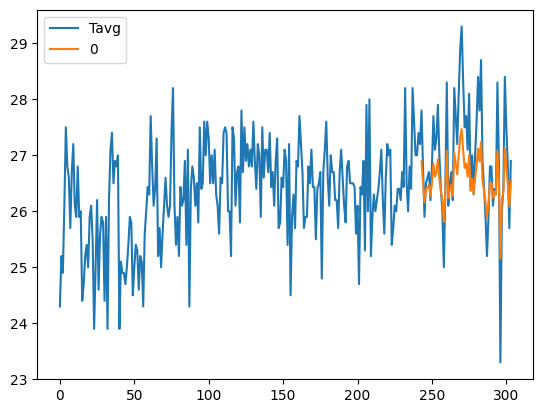

In [29]:
kan.plot()

In [30]:
new_data = [[0],[1],[2],[3],[4],[5],[6]]
lr.predict(new_data)

array([16.16960345, 16.55521201, 16.94082058, 17.32642914, 17.7120377 ,
       18.09764627, 18.48325483])

In [31]:
kan.to_json('prediksi_jawa barat')